In [58]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [60]:
data = sio.loadmat('C:\\Users\\Administrator\\Desktop\\bird_small.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [62]:
A = data['A']
A.shape

(128, 128, 3)

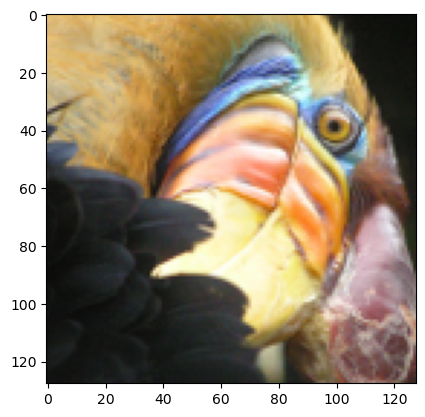

In [64]:
#导入图像数据
from skimage import io
image = io.imread('C:\\Users\\Administrator\\Desktop\\bird_small.png')
plt.imshow(image)

In [66]:
def find_centers(x,idx,k):
    centers = []
    for i in range(k):
        center_i = np.mean(x[idx==i],axis=0)
        centers.append(center_i)
    return np.array(centers)

In [68]:
def classify(x,centers):
    idx = []
    for i in range(len(x)):
        # np.linalg.norm用于计算向量或矩阵的范数
        ''' L1范数（ord=1）：向量元素绝对值的和
            L2范数（ord=2，默认）：向量的欧几里得长度（即勾股定理）
            无穷范数（ord=np.inf）：向量元素绝对值的最大值
            负无穷范数（ord=-np.inf）：向量元素绝对值的最小值
            Frobenius范数（ord=‘fro’）：矩阵元素的平方和的平方根（仅对矩阵有效）'''
        dist = np.linalg.norm((x[i] - centers),axis=1)
        id_i = np.argmin(dist)
        idx.append(id_i)
    return np.array(idx)

In [70]:
def kmeans(x,iters,centers):
    #记录每一次迭代的中心点
    centers_all = []
    centers_all.append(centers)
    new_centers = centers
    for i in range(iters):
        idx = classify(x,new_centers)
        new_centers = find_centers(x,idx,len(new_centers))
        centers_all.append(new_centers)

    return idx,np.array(centers_all)

In [72]:
def init_centers(x,k):
    index = np.random.choice(len(x),k)
    return x[index]

#对A中的数据进行归一化和调整结构

In [75]:
A = A / 255
A = A.reshape(-1,3)

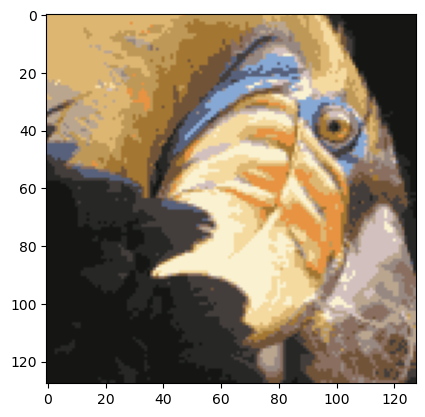

In [77]:
k = 16
centers = init_centers(A,k)
idx,center_all = kmeans(A,20,centers)
#保存最后一次的聚类中心
centers = center_all[-1]
#定义重绘后的图像
im = np.zeros(A.shape)
for i in range (k):
     im[idx==i] = centers[i]
im = im.reshape(128,128,3)
plt.imshow(im)